# Exercise 04 - Due Saturday, November 18 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a star schema. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

** Add your markdown and code cells only in the designated areas after "Answers:". Do not remove or change any existing cells. **

*Deadline*: Saturday, November 18, 12pm.

## Setup - obtain data

The US City Open Data Census has data on [Campaign Finance Contributions](http://us-city.census.okfn.org/dataset/campaign-finance).  Let's take a look at data from [Washington DC](http://opendata.dc.gov/datasets/campaign-financial-contributions).

First we download the dataset:

In [1]:
!wget -O dc_contributions.csv https://opendata.arcgis.com/datasets/6443e0b5b2454e86a3208b8a38fdee84_34.csv

--2017-11-18 06:51:10--  https://opendata.arcgis.com/datasets/6443e0b5b2454e86a3208b8a38fdee84_34.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.235.70.5, 52.22.192.109
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.235.70.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘dc_contributions.csv’

dc_contributions.cs     [   <=>              ]  53.31M   112MB/s    in 0.5s    

2017-11-18 06:51:11 (112 MB/s) - ‘dc_contributions.csv’ saved [55903436]



## Part 1 - examine the data (30 points)

**Question 1** :
Use `csvstat` and other tools as you see fit and observe its contents. Describe what you see:  How many records does  this dataset have? What do all the columns mean?  Are there null values?  Which columns interest you the most? Which columns present facts and which columns present dimensions?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

Hint: to get help on command line tools, try the `--help` option. For example: `csvstat --help`.

Hint: due to the size of the dataset, if you use `csvstat`, you can apply it on sample or the first 10000 lines.

**Answer:**

In [2]:
!xsv count dc_contributions.csv

214975


There are 214,975 lines in the table.

In [3]:
!xsv headers dc_contributions.csv

1   OBJECTID
2   COMMITTEENAME
3   CANDIDATENAME
4   ELECTIONYEAR
5   CONTRIBUTORNAME
6   ADDRESS
7   CONTRIBUTORTYPE
8   CONTRIBUTIONTYPE
9   EMPLOYER
10  EMPLOYERADDRESS
11  AMOUNT
12  DATEOFRECEIPT
13  ADDRESS_ID
14  XCOORD
15  YCOORD
16  LATITUDE
17  LONGITUDE
18  FULLADDRESS
19  GIS_LAST_MOD_DTTM


In [4]:
!head dc_contributions.csv | xsv table

OBJECTID  COMMITTEENAME                           CANDIDATENAME     ELECTIONYEAR  CONTRIBUTORNAME           ADDRESS                                                 CONTRIBUTORTYPE  CONTRIBUTIONTYPE  EMPLOYER                EMPLOYERADDRESS                                   AMOUNT                                      DATEOFRECEIPT             ADDRESS_ID                XCOORD     YCOORD     LATITUDE          LONGITUDE          FULLADDRESS                 GIS_LAST_MOD_DTTM
1001      Fenty 2006                              Adrian Fenty      2006          Jesse Fenty               408 Cedar Street, NW, Washington, DC 20012              Individual       Check             Dept. of Commerce       Washington, DC                                    2000                                        2005-07-21T00:00:00.000Z  259678                    398379.06  145173.76  38.9744832244325  -77.0187060408559  408 CEDAR STREET NW         2017-11-13T06:18:09.000Z
1002      Elissa 2013                        

* ID is the identification for each contribution.
* COMMITTEENAME is the commitee where the candidate was from.
* CANDIDATENAME is the name of candidate who received the contribution.
* ELECTIONYEAR is the year of the election.
* ADDRESS is the contributor's address.
* CONTRIBUTIONTYPE is the type the contribution, individual or corporation.
* CONTRIBUTIONTYPE is the type of contribution, check, credit ot cash.
* EMPLOYER is the employer of the contributor.
* EMPLOYERADDRESS is the address of the employer.
* AMOUNT is the amount of contributor.
* DATEOFRECEIPT is the date when candidate receive the contribution.
* ADDRESSID is the identification of the employer's address.
* XCOORD, YCORD are the coordination of the employer's address.
* LATITUDE, LONGITUDE are the LATITUDE and LONGITUDE of the employer's address.
* FULLADDRESS is full version of the address.
* GIS_LAST_MOD_DTTM shows the last modification datetime of the record.

In [5]:
!csvcut dc_contributions.csv | csvstat

  1. ﻿OBJECTID
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 214975
	Sum: 23107232800
	Mean: 107488.0
	Median: 107488
	Standard Deviation: 62057.93705884848
	Unique values: 214975
  2. COMMITTEENAME
	<class 'str'>
	Nulls: False
	Unique values: 1199
	5 most frequent values:
		Verizon Communications Inc. Good Government Club - Washington DC:	12105
		Washington DC Association of Realtors PAC:	9978
		Fenty 2006:	8221
		Muriel Bowser for Mayor:	7092
		Gray for Mayor:	7029
	Max length: 113
  3. CANDIDATENAME
	<class 'str'>
	Nulls: True
	Unique values: 386
	5 most frequent values:
		Adrian Fenty:	17440
		Muriel Bowser:	13320
		Vincent Gray:	13311
		Florence Pendleton:	12144
		Jack Evans:	8997
	Max length: 26
  4. ELECTIONYEAR
	<class 'int'>
	Nulls: True
	Min: 2002
	Max: 2018
	Sum: 431966044
	Mean: 2009.6397902738815
	Median: 2010
	Standard Deviation: 4.594603129244718
	Unique values: 14
	5 most frequent values:
		2014:	40696
		2006:	34433
		2010:	26530
		2002:	25657
		2015:	18509
  5. CONTRIBUTO

There are null values in colums of CANDIDATENAME, ELECTIONYEAR, CONTRIBUTORNAME, ADDRESS, CONTRIBUTORTYPE, CONTRIBUTIONTYPE, EMPLOYER, EMPLOYERADDRESS, AMOUNT, ADDRESS_ID, XCOORD, YCOORD, LATITUDE, LONGITUDE, FULLADDRESS.

ELECTIONYEAR, EMPLOYER, AMOUNT interst me most.

COMMITTEENAME,CANDIDATENAME,ELECTIONYEAR,AMOUNT,EMPLOYER provide the fact and the other columns provide the dimensions.

## Part 2 - create a database and load the data (40 points)
Create and connect to a new database, create database tables in it based on the following provided star schema, and load this dataset into it. 

* `campaign` (`campaign_key`, `committee_name`, `candidate_name`, `election_year`)
* `contributor` (`contributor_key`, `name`, `type`, `employer`)
* `contribution_facts` (`campaign_key`, `contributor_key`, `amount`)

In [6]:
%load_ext sql

In [7]:
!dropdb --if-exists -U student assignment4

In [8]:
!createdb -U student assignment4

In [9]:
%sql postgresql://student@/assignment4

'Connected: student@assignment4'

First, let's create the table `contribution_facts`:

In [10]:
%%sql
DROP TABLE IF EXISTS contribution_facts;

CREATE TABLE contribution_facts (
    id INTEGER,
    committee_name VARCHAR(500) NOT NULL,
    candidate_name VARCHAR(50),
    election_year INTEGER NOT NULL,
    contributor_name VARCHAR(500),
    contributor_address VARCHAR(500),
    contributor_type VARCHAR(100),
    contribution_type VARCHAR(100),
    employer VARCHAR(500),
    employer_address VARCHAR(500),
    amount NUMERIC(20, 2),
    date_of_receipt DATE NOT NULL,
    address_id INTEGER,
    address_x NUMERIC(20, 2),
    address_y NUMERIC(20, 2),
    address_latitude NUMERIC,
    address_longitude NUMERIC,
    address_full VARCHAR(500),
    gis_last_mod TIMESTAMPTZ NOT NULL
)

Done.
Done.


[]

** Question 2 (10 points)** :
Load the dataset into the table `contribution_facts` and verify the loaded records.

Hint: If you get some errors, please examine the error messages carefully and fix the problems, including any problems in the above CREATE TABLE statement.

** Answer: **

In [11]:
!cp dc_contributions.csv /tmp/dc_contributions.csv

There are null values in the election_year colums, which will cause the failure of loading data into contribution_facts table. I create a 'temp' table first.

In [12]:
%%sql
DROP TABLE IF EXISTS temp;

CREATE TABLE temp (
    id INTEGER,
    committee_name VARCHAR(500) NOT NULL,
    candidate_name VARCHAR(50),
    election_year INTEGER,
    contributor_name VARCHAR(500),
    contributor_address VARCHAR(500),
    contributor_type VARCHAR(100),
    contribution_type VARCHAR(100),
    employer VARCHAR(500),
    employer_address VARCHAR(500),
    amount NUMERIC(20, 2),
    date_of_receipt DATE NOT NULL,
    address_id INTEGER,
    address_x NUMERIC(20, 2),
    address_y NUMERIC(20, 2),
    address_latitude NUMERIC,
    address_longitude NUMERIC,
    address_full VARCHAR(500),
    gis_last_mod TIMESTAMPTZ NOT NULL
)

Done.
Done.


[]

In [13]:
%%sql
COPY temp FROM '/tmp/dc_contributions.csv'
CSV
HEADER;

214975 rows affected.


[]

Set all null value in election_year 1900.

In [14]:
%%sql
UPDATE temp
SET election_year = 1900
WHERE election_year is null;

28 rows affected.


[]

In [15]:
%%sql
INSERT INTO contribution_facts (id,
                                committee_name,
                                candidate_name,
                                election_year,
                                contributor_name,
                                contributor_address,
                                contributor_type,
                                contribution_type,
                                employer,
                                employer_address,
                                amount,
                                date_of_receipt,
                                address_id,
                                address_x,
                                address_y,
                                address_latitude,
                                address_longitude,
                                address_full,
                                gis_last_mod)
SELECT *
FROM temp;

214975 rows affected.


[]

In [16]:
%%sql
DROP TABLE temp;

Done.


[]

** End of answer to Question 2 **

Next, we are going to create the dimension table `contributor`. 

First let's work on the SELECT statement that extracts contributor-related dimension details like `contributor_name`, `contributor_type` and `employer`.

In [17]:
%%sql
SELECT DISTINCT contributor_name, contributor_type, employer
FROM contribution_facts
LIMIT 10;

10 rows affected.


contributor_name,contributor_type,employer
None,None,None
Victor Ayala,Individual,DC Taxicab Commission
Harry Harrison,Individual,Aronson LLC
DC Development & Consulting LLC,Corporation,None
Virginia Contractors Supply Inc,Corporation,None
Euclid Mortgage Aservices,Corporation,None
Kool Smiles,Corporation,None
Summer Smith,Individual,Not reported
Shelly Waite,Individual,Waite Secured Line Technology Solutions LLC
Clark Ray,Individual,DC Governmnet


Please note NULLs in the query result. Now we can create the dimension table `contributor` to house the dimensions `contributor_name`, `contributor_type` and `employer`.

In [18]:
%%sql
DROP TABLE IF EXISTS contributor;

CREATE TABLE contributor (
    contributor_key SERIAL PRIMARY KEY,
    name VARCHAR(500),
    type VARCHAR(100),
    employer VARCHAR(500)
);

Done.
Done.


[]

Populate the dimension table with unique values of these three dimensions from the dataset.

In [19]:
%%sql
INSERT INTO contributor (name, type, employer)
SELECT DISTINCT contributor_name, contributor_type, employer
FROM contribution_facts;

144249 rows affected.


[]

Next, we add a foreign key column to the fact table that references `contributor` dimension table.

In [20]:
%%sql
ALTER TABLE contribution_facts
ADD COLUMN contributor_key INTEGER,
ADD CONSTRAINT fk_contributor_key
    FOREIGN KEY (contributor_key)
    REFERENCES contributor (contributor_key);

Done.


[]

In [21]:
%%sql
SELECT contributor_key FROM contribution_facts
LIMIT 10;

10 rows affected.


contributor_key
None
None
None
None
None
None
None
None
None
None


As we can see, the values for the `contributor_key` are NULLs initially. We will populate `contributor_key` with correct values next.

First let's create an index on all columns in `contributor` to improve the performance of queries.

In [22]:
%%sql
DROP INDEX IF EXISTS idx_contributor;

CREATE INDEX idx_contributor ON contributor (name, type, employer);

Done.
Done.


[]

In [23]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE contribution_facts.contributor_name = contributor.name 
    AND contribution_facts.contributor_type = contributor.type 
    AND contribution_facts.employer = contributor.employer;

123395 rows affected.


[]

** Question 3 (10 points) **:
Have all rows in `contribution_facts` been updated by the above UPDATE statement? If not, explain why some rows weren't updated. Modify the UPDATE statement to fix it.

** Answer: **

Not all rows have been updated because there are null values in the employer and contributorname columns so the the rows have been updated.

In [24]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE contribution_facts.contributor_name = contributor.name 
    AND contribution_facts.contributor_type = contributor.type 
    AND contribution_facts.employer = contributor.employer
    AND contributor.employer is not null;

123395 rows affected.


[]

In [25]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE contribution_facts.contributor_name = contributor.name 
    AND contribution_facts.contributor_type = contributor.type 
    AND contributor.employer is null;

141047 rows affected.


[]

In [26]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE contribution_facts.contributor_name = contributor.name 
    AND contributor.type is null
    AND contributor.employer is null;

872 rows affected.


[]

** End of answer to Question 3 **

** Question 4 (20 points) **:
Now it is your turn to create and populate the dimension table `campaign`, add the campaign foreign key to the fact table and populate the foreign key values for all the facts.

** Answer: **

In [27]:
%%sql
SELECT DISTINCT committee_name, candidate_name, election_year
FROM contribution_facts
LIMIT 10;

10 rows affected.


committee_name,candidate_name,election_year
Committee to Elect Tom Dawson,Thomas Dawson,2004
Committee to Elect Pranav Badhwar,Pranav Badhwar,2014
Milligan for Ward 4 Committee,Artee RT Milligan,2007
Barbara J. Clark,None,2016
Christopher Gabris,None,2015
Mendelson For Council 2002,Phil Mendelson,2002
Bob Ward,None,2016
Jahi for Ward 4,Baruti Jahi,2012
Phil Tsolakidis,None,2016
Stand for Marriage DC Initiative,None,2010


In [28]:
%%sql
DROP TABLE IF EXISTS campaign;

CREATE TABLE campaign (
    campaign_key SERIAL PRIMARY KEY,
    committee_name VARCHAR(500),
    candidate_name VARCHAR(100),
    election_year INT
);

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO campaign (committee_name, candidate_name, election_year)
SELECT DISTINCT committee_name, candidate_name, election_year
FROM contribution_facts;

1238 rows affected.


[]

In [30]:
%%sql
ALTER TABLE contribution_facts
ADD COLUMN campaign_key INTEGER,
ADD CONSTRAINT fk_campaign_key
    FOREIGN KEY (campaign_key)
    REFERENCES campaign (campaign_key);

Done.


[]

In [31]:
%%sql
DROP INDEX IF EXISTS idx_campaign;

CREATE INDEX idx_campaign ON campaign (committee_name, candidate_name, election_year);

Done.
Done.


[]

In [32]:
%%sql
UPDATE contribution_facts
SET campaign_key = campaign.campaign_key
FROM campaign
WHERE contribution_facts.committee_name = campaign.committee_name 
    AND contribution_facts.candidate_name = campaign.candidate_name 
    AND contribution_facts.election_year = campaign.election_year
    AND campaign.candidate_name is not null;

196801 rows affected.


[]

In [33]:
%%sql
UPDATE contribution_facts
SET campaign_key = campaign.campaign_key
FROM campaign
WHERE contribution_facts.committee_name = campaign.committee_name 
    AND campaign.candidate_name is null
    AND contribution_facts.election_year = campaign.election_year;

18343 rows affected.


[]

** End of answer to Question 4 **

We can now remove all columns in `contribution_facts` that are not facts nor foreign keys of dimension tables.

In [34]:
%%sql
ALTER TABLE contribution_facts
DROP COLUMN id,
DROP COLUMN committee_name,
DROP COLUMN candidate_name,
DROP COLUMN election_year,
DROP COLUMN contributor_name,
DROP COLUMN contributor_address,
DROP COLUMN contributor_type,
DROP COLUMN contribution_type,
DROP COLUMN employer,
DROP COLUMN employer_address,
DROP COLUMN address_id,
DROP COLUMN address_x,
DROP COLUMN address_y,
DROP COLUMN address_latitude,
DROP COLUMN address_longitude,
DROP COLUMN address_full,
DROP COLUMN gis_last_mod;

Done.


[]

In [35]:
%%sql
select * from contribution_facts limit 10;

10 rows affected.


amount,date_of_receipt,contributor_key,campaign_key
50.00,2010-07-16,44971,526
100.00,2013-09-16,42367,685
201.00,2011-04-12,107499,940
75.00,2006-09-04,72824,32
500.00,2009-01-29,29591,90
200.00,2014-03-07,12617,705
51.00,2011-09-30,61779,1168
51.00,2014-07-31,134832,179
75.00,2016-01-14,134832,219
75.00,2006-07-06,21599,32


## Part 3 - explore your data (30 points)

** Question 5 **:
Now that the data is loaded, ask at least a couple of questions of it!  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

**Answer**:

In [36]:
%matplotlib inline

** Question : ** What is trend of total contribution by year?

In [37]:
%%sql
SELECT extract(year from date_of_receipt) AS year, sum(amount) AS total_amount
FROM contribution_facts
WHERE date_of_receipt <= now()
GROUP BY year
ORDER BY year

15 rows affected.


year,total_amount
2003.0,2047031.87
2004.0,4419645.70
2005.0,3683497.31
2006.0,12286710.30
2007.0,3833537.96
2008.0,5866555.02
2009.0,3973221.61
2010.0,9576191.63
2011.0,3313014.20
2012.0,3433340.78


<Container object of 15 artists>

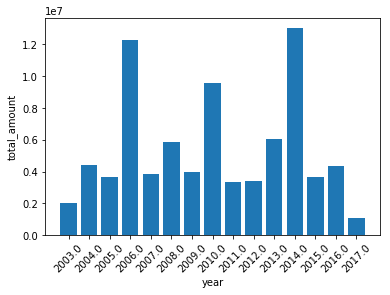

In [38]:
_.bar()

We can see that the peaks of contribution appeared every four years (2006, 2010, 2014), when the elections of the mayor of DC took place. It can be inferred that the contributions are highly correlated to the mayor elections.

** Question: ** Who received the most by year?

In [39]:
%%sql
SELECT c.year, c.candidate, h.MAX
FROM
(SELECT extract(year from a.date_of_receipt) AS year, b.candidate_name AS candidate, sum(a.amount) AS amount
 FROM contribution_facts AS a
 JOIN campaign AS b
 ON a.campaign_key = b.campaign_key
 WHERE b.candidate_name is not null
 GROUP BY year, candidate) AS c
JOIN
(SELECT g.year, MAX(g.amount) AS MAX
 FROM
 (SELECT extract(year from e.date_of_receipt) AS year, f.candidate_name AS candidate, sum(e.amount) AS amount
  FROM contribution_facts AS e
  JOIN campaign AS f
  ON e.campaign_key = f.campaign_key
  WHERE f.candidate_name is not null
  GROUP BY year, candidate) AS g
 GROUP BY year) AS h
ON c.year = h.year
WHERE c.amount = h.MAX
ORDER BY c.year

15 rows affected.


year,candidate,max
2003.0,Lankward Smith,447059.46
2004.0,Harold Brazil,379679.57
2005.0,Adrian Fenty,686202.73
2006.0,Adrian Fenty,3220083.21
2007.0,Muriel Bowser,497324.27
2008.0,Adrian Fenty,1941816.93
2009.0,Adrian Fenty,1828334.36
2010.0,Vincent Gray,2744713.83
2011.0,Vincent Orange,471288.09
2012.0,Phil Mendelson,271092.55


In [40]:
%%sql
SELECT g.year, MAX(g.amount) AS MAX
 FROM
 (SELECT extract(year from e.date_of_receipt) AS year, f.candidate_name AS candidate, sum(e.amount) AS amount
  FROM contribution_facts AS e
  JOIN campaign AS f
  ON e.campaign_key = f.campaign_key
  WHERE f.candidate_name is not null
  GROUP BY year, candidate) AS g
 GROUP BY year

15 rows affected.


year,max
2003.0,447059.46
2004.0,379679.57
2005.0,686202.73
2006.0,3220083.21
2007.0,497324.27
2008.0,1941816.93
2009.0,1828334.36
2010.0,2744713.83
2011.0,471288.09
2012.0,271092.55


<Container object of 15 artists>

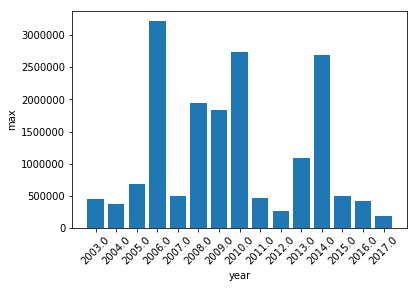

In [41]:
_.bar()

From the result, we can see that Adrian Fentry received the most contributions for 4 times from 2005 to 2009. Adrian was the member of Council of DC from 2001 to 2007 and then was elected as Mayor of DC. He was an active politician and the results above was coincided with his campaign.

**Question : **
Who contributed the most by year?

In [42]:
%%sql
SELECT c.year, c.contributor, h.MAX
FROM
(SELECT extract(year from a.date_of_receipt) AS year, b.name AS contributor, sum(a.amount) AS amount
 FROM contribution_facts AS a
 JOIN contributor AS b
 ON a.contributor_key = b.contributor_key
 GROUP BY year, contributor) AS c
JOIN
(SELECT g.year, MAX(g.amount) AS MAX
 FROM
 (SELECT extract(year from e.date_of_receipt) AS year, f.name AS contributor, sum(e.amount) AS amount
  FROM contribution_facts AS e
  JOIN contributor AS f
  ON e.contributor_key = f.contributor_key
  GROUP BY year, contributor) AS g
 GROUP BY year) AS h
ON c.year = h.year
WHERE c.amount = h.MAX
ORDER BY c.year

15 rows affected.


year,contributor,max
2003.0,Citizens to Re-Elect Cropp Chair,133383.65
2004.0,"North Atlantic Investments, LLC",1370900.00
2005.0,"Atlantic Northstar, LLC",523498.51
2006.0,"Atlantic Northstar, LLC",840366.64
2007.0,Fenty 2006,400000.00
2008.0,Fenty 2006,313478.52
2009.0,Receipts Not Reported PNC Bank,152345.00
2010.0,American Federation of Teachers,381368.00
2011.0,SEIU MD/DC State Council,105451.93
2012.0,SEIU MD/DC State Council,109755.13


In [43]:
%%sql
SELECT g.year, MAX(g.amount) AS MAX
 FROM
 (SELECT extract(year from e.date_of_receipt) AS year, f.name AS contributor, sum(e.amount) AS amount
  FROM contribution_facts AS e
  JOIN contributor AS f
  ON e.contributor_key = f.contributor_key
  GROUP BY year, contributor) AS g
 GROUP BY year

15 rows affected.


year,max
2003.0,133383.65
2004.0,1370900.00
2005.0,523498.51
2006.0,840366.64
2007.0,400000.00
2008.0,313478.52
2009.0,152345.00
2010.0,381368.00
2011.0,105451.93
2012.0,109755.13


<Container object of 15 artists>

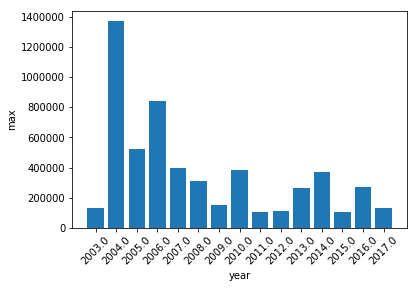

In [44]:
_.bar()

* There are three companies which was the top contributors in two years. Atlantic Northstar, LLC was the most active in 2005 and 2006; Fenty 2006 was the most active in 2007 and 2008; SEIU MD/DC State Council was the active active in 2011 and 2012.